In [1]:
import re
import glob
import sys
import pandas as pd
import pickle
from sklearn.metrics import *

%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
plt.rcParams["figure.figsize"] = (20,12)

def extract_stats(fn, seq_re):
    seq = re.search(seq_re, fn).group(1)
    out = open(fn, 'r').read()
    try:
        return dict(
            ap=re.search("mean average precision \(mAP\) = ([\.\d]+)", out).group(1),
            precision=re.search("precision = ([\.\d]+)", out).group(1),
            recall=re.search("recall = ([\.\d]+)", out).group(1),
            f1=re.search("F1-score = ([\.\d]+)", out).group(1),
            seq=seq,
        )
    except:
        print("Unexpected error:", sys.exc_info()[0])
        return None


def batch_perf(batch, seq_re="yolov2-voc_([\d]+).weights.out"):
    stats = []
    for f in glob.glob(batch):
        if extract_stats(f, seq_re):
            stats.append(extract_stats(f, seq_re))
    df = pd.DataFrame(stats, dtype='float')
    return df.set_index('seq').sort_index()

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


seq
3700.0     0.482013
12300.0    0.480056
5600.0     0.479165
12800.0    0.477331
3400.0     0.477224
11500.0    0.476154
11700.0    0.475105
12000.0    0.474687
9100.0     0.474361
13700.0    0.472955
Name: ap, dtype: float64

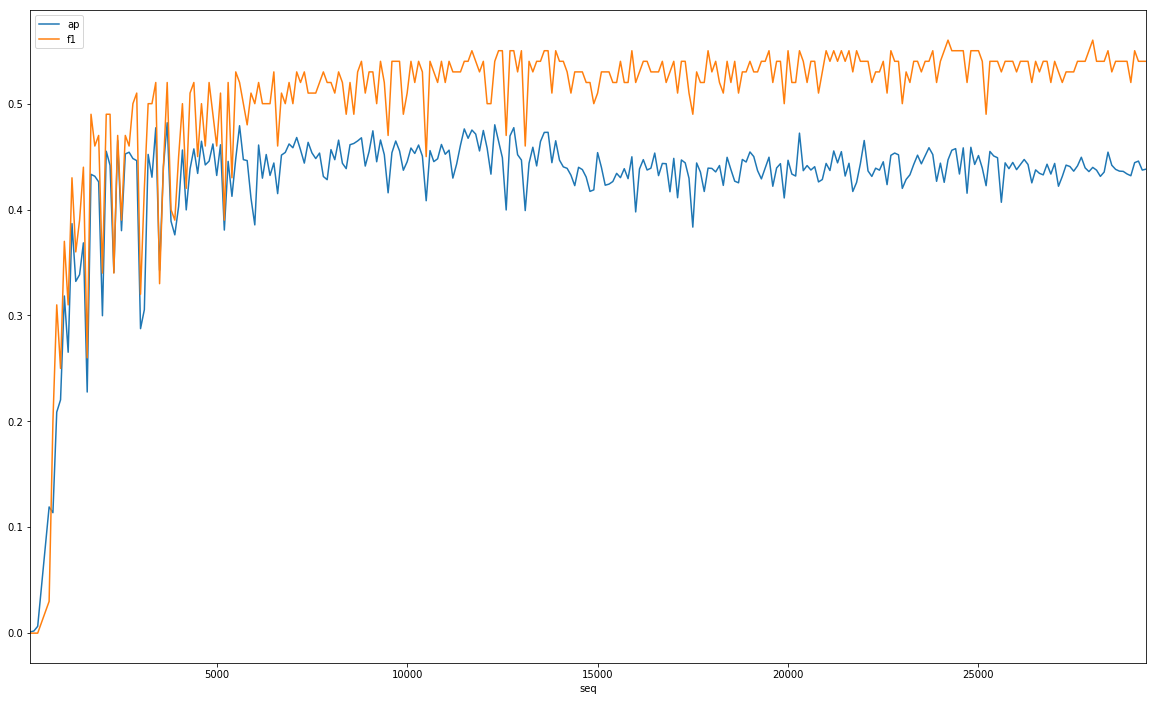

In [9]:
df_train = batch_perf('/mnt/ml-data4/error_analysis/baseline/1661.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error_analysis/baseline/1661.out/*.weights.out')
# df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
df_val[['ap', 'f1']].plot()
df_val.ap.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


seq
5000.0     0.419031
2000.0     0.418875
3300.0     0.418389
23100.0    0.417701
23400.0    0.416190
11700.0    0.414706
20300.0    0.413739
20700.0    0.413436
12900.0    0.412790
22500.0    0.412747
Name: ap, dtype: float64

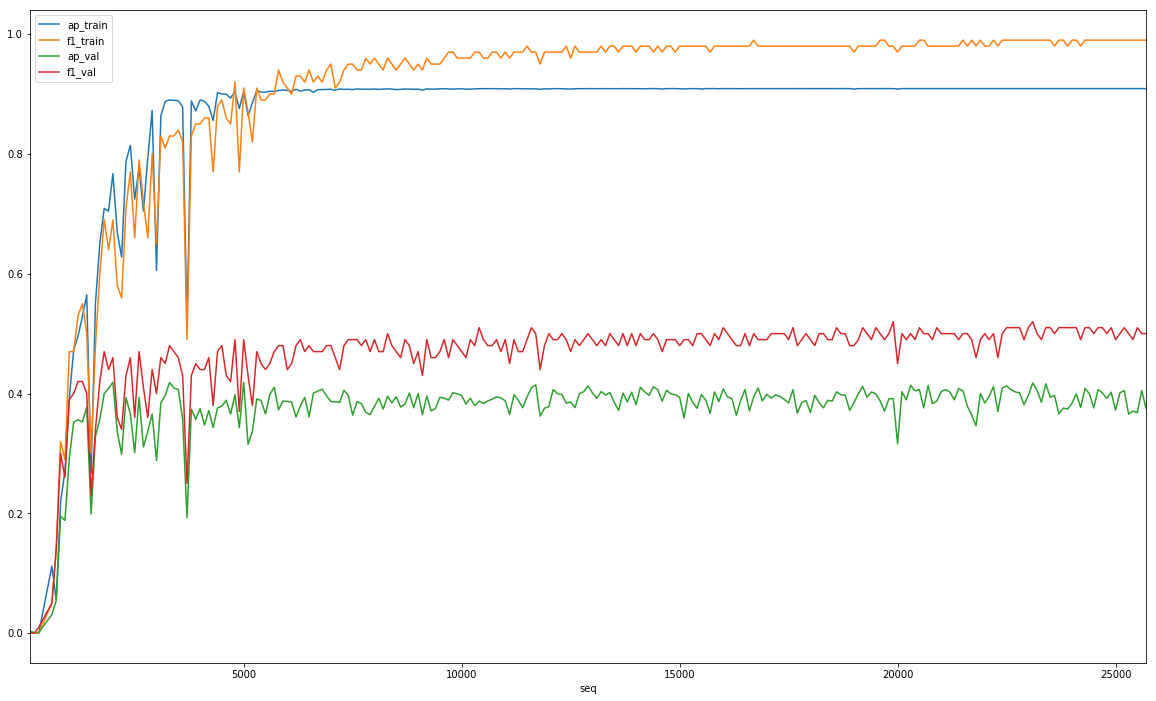

In [52]:
df_train = batch_perf('/mnt/ml-data4/error-analysis/baseline/800.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error-analysis/baseline/800.out/*.weights.out')
df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
# df_val[['ap', 'f1']].plot()
df_val.ap.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


seq
7900.0    0.47
9000.0    0.47
9100.0    0.47
9500.0    0.47
5700.0    0.46
6400.0    0.46
6700.0    0.46
7000.0    0.46
7700.0    0.46
7800.0    0.46
Name: f1, dtype: float64

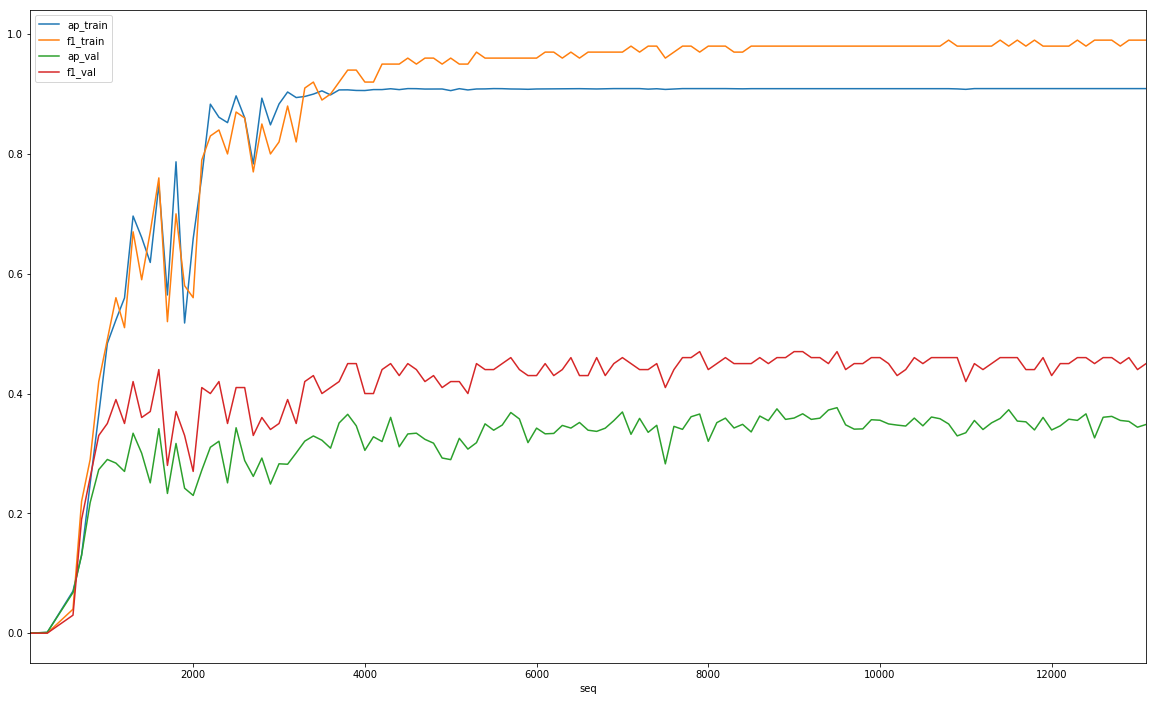

In [8]:
df_train = batch_perf('/mnt/ml-data4/error_analysis/baseline/400.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error_analysis/baseline/400.out/*.weights.out')
df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
# df_val[['ap', 'f1']].plot()
df_val.f1.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


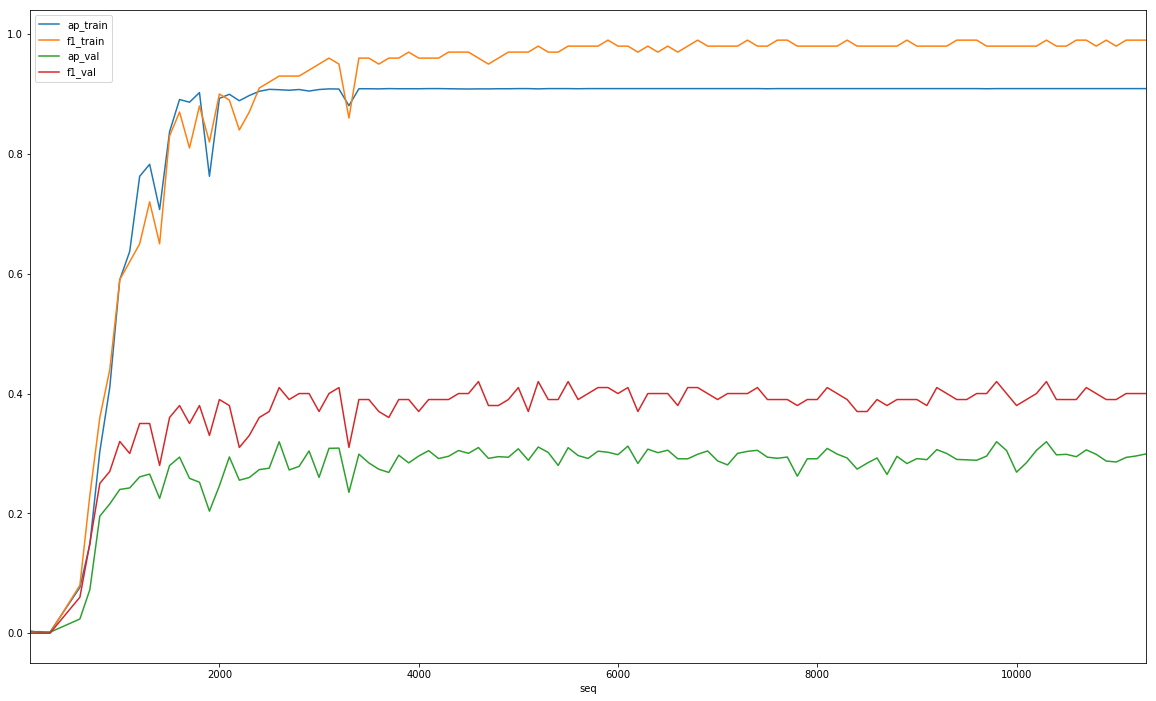

In [12]:
df_train = batch_perf('/mnt/ml-data4/error_analysis/baseline/200.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error_analysis/baseline/200.out/*.weights.out')
df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
# df_val[['ap', 'f1']].plot()
# df_val.ap.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


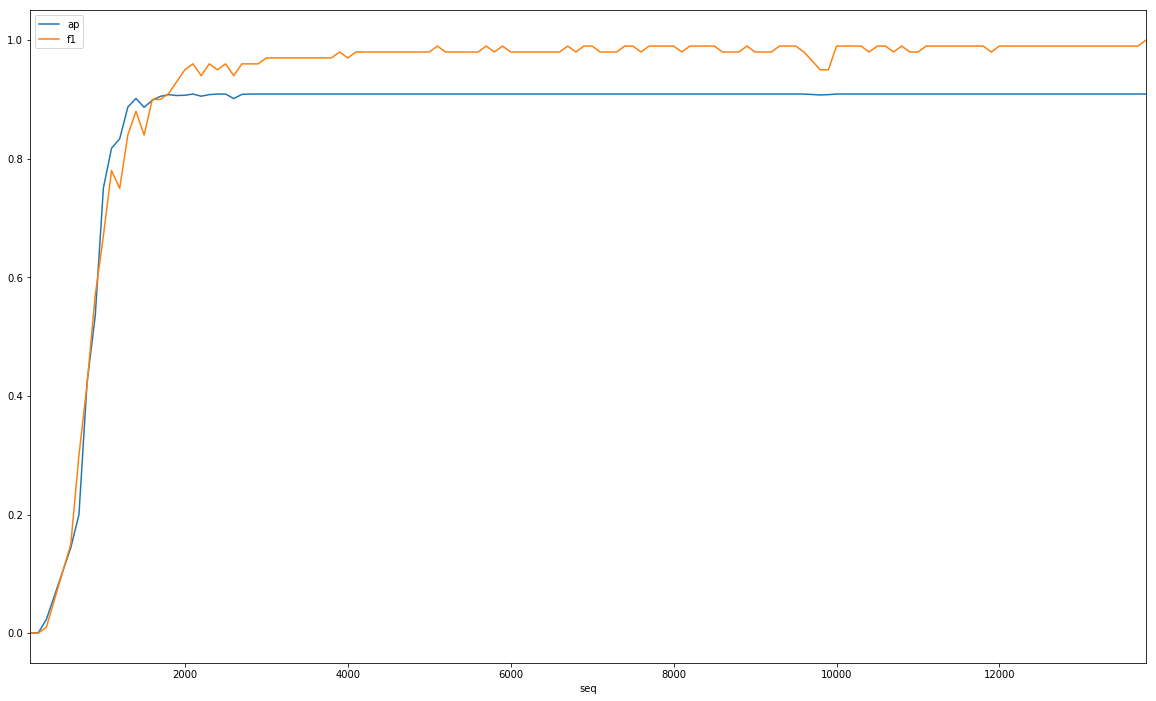

In [10]:
df_train = batch_perf('/mnt/ml-data4/error_analysis/baseline/100.train.out/*.weights.out')
# df_val = batch_perf('/mnt/ml-data1/BBox-Label-Tool/error_analysis/100.out/*.weights.out')
# df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
df_train[['ap', 'f1']].plot()
# df_val.ap.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


seq
1700.0    0.526850
2300.0    0.519699
1800.0    0.504411
4600.0    0.496299
1400.0    0.495133
3600.0    0.491358
2400.0    0.489463
1900.0    0.488193
3400.0    0.487890
5600.0    0.486168
Name: ap, dtype: float64

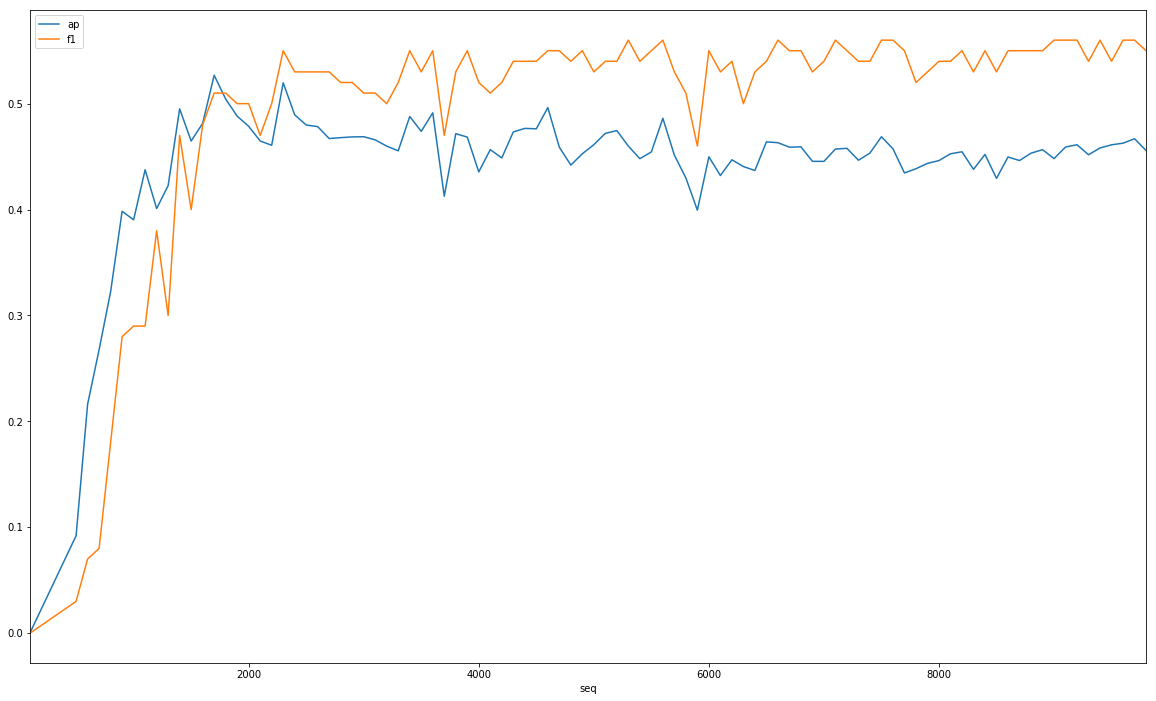

In [10]:
# df_train = batch_perf('/mnt/ml-data4/error_analysis/yolo/100.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error_analysis/yolov3/1661.out/*.weights.out', seq_re="yolov3_([\d]+).weights.out")
# df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
df_val[['ap', 'f1']].plot()
df_val.ap.nlargest(10)

Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>
Unexpected error: <class 'AttributeError'>


seq
2700.0    0.521431
3900.0    0.520419
2600.0    0.518719
3300.0    0.516360
3200.0    0.513797
3400.0    0.512172
3100.0    0.512150
2200.0    0.509224
6100.0    0.507772
5200.0    0.505195
Name: ap, dtype: float64

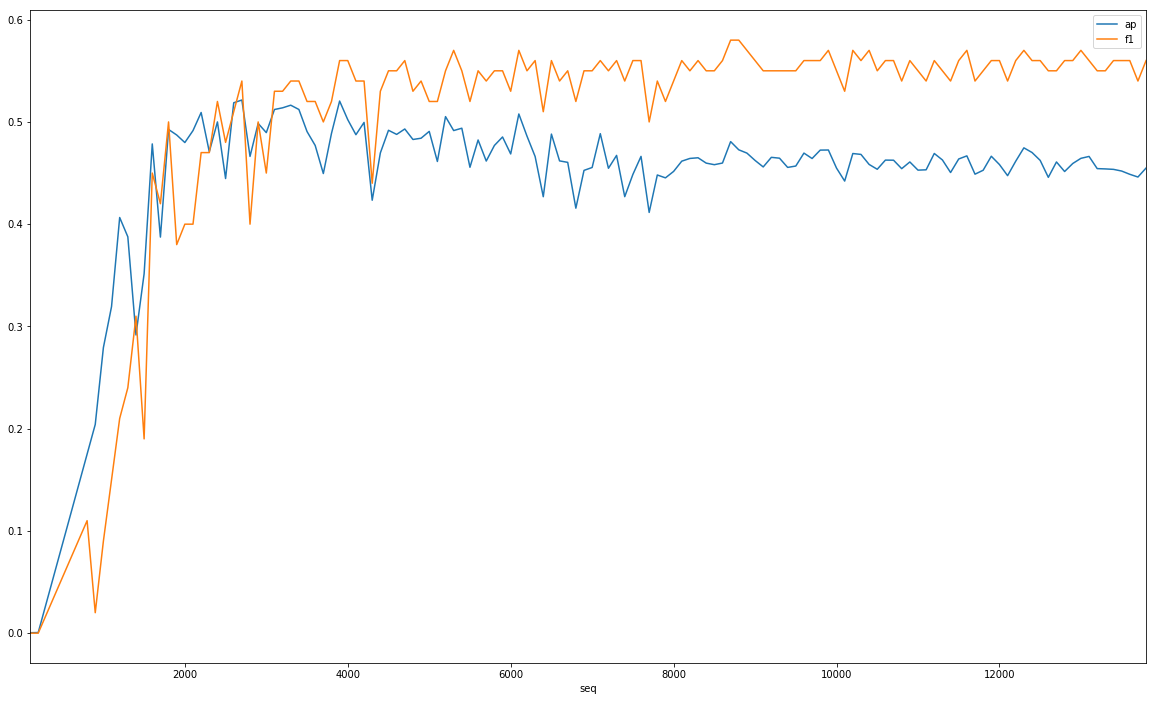

In [12]:
# df_train = batch_perf('/mnt/ml-data4/error_analysis/yolo/100.train.out/*.weights.out')
df_val = batch_perf('/mnt/ml-data4/error_analysis/yolov3/0.0002.out/*.weights.out', seq_re="yolov3_([\d]+).weights.out")
# df_train.merge(df_val, left_index=True, right_index=True, suffixes=('_train', '_val'))[['ap_train', 'f1_train', 'ap_val', 'f1_val']].plot()
df_val[['ap', 'f1']].plot()
df_val.ap.nlargest(10)

In [2]:
plt.rcParams["figure.figsize"] = (12,6)

def extract_stats(fn, seq_re, thresh=0.25):
    seq = re.search(seq_re, fn).group(1)
    ds = pickle.load( open( fn, "rb" ) )
    df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
    df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')
    df['y_pred'] = df.p > thresh
    
    return dict(
        precision=precision_score(df.y_true, df.y_pred, average='binary'),
        recall=recall_score(df.y_true, df.y_pred, average='binary'),
        f1=f1_score(df.y_true, df.y_pred, average='binary'),
        seq=seq,
        df=df,
    )

def batch_perf(batch, seq_re="yolov2-voc_([\d]+).weights.pkl"):
    stats = []
    for f in glob.glob(batch):
        if extract_stats(f, seq_re):
            stats.append(extract_stats(f, seq_re))
    df = pd.DataFrame(stats, dtype='float')
    return df.set_index('seq').sort_index()

In [3]:
df_1661 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/1661.out/*.pkl')
df_800 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/800.out/*.pkl')
df_400 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/400.out/*.pkl')
# df_200 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/200.out/*.pkl')
# df_100 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/100.out/*.pkl')
# df_1230 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/1230.out/*.pkl')
df_2461 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/2461.out/*.pkl')
# df_3562 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/3562.out/*.pkl')
df_800_neg = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/800_neg.out/*.pkl')
df_800_neg_1600 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/800_neg_1600.out/*.pkl')
df_800_neg_6013 = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/800_neg_6013.out/*.pkl')
df_400_neg = batch_perf('/mnt/ml-data4/error-analysis/tsd-val/400_neg.out/*.pkl')

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: P

0.5367671960233692
0.5479655202989954
0.5514974598976882
0.5498254952141913
neg
0.573215504380394
0.5715409489575309
0.5892509167267863
0.5800360639178287
seq
2300.0    0.597087
2600.0    0.588506
2400.0    0.582160
1900.0    0.578669
2000.0    0.578390
1300.0    0.577828
2700.0    0.568750
2900.0    0.566735
2100.0    0.560947
3600.0    0.560706
Name: f1, dtype: float64


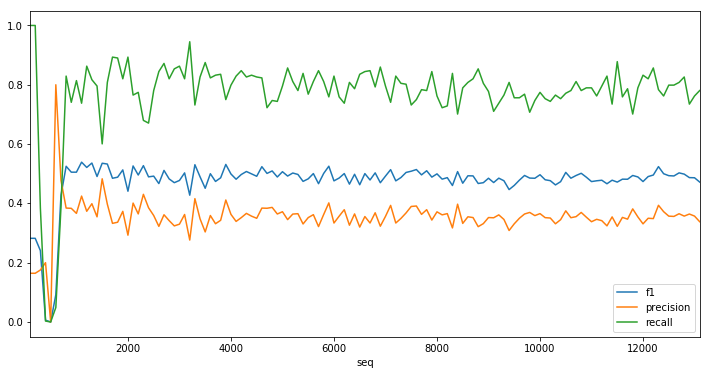

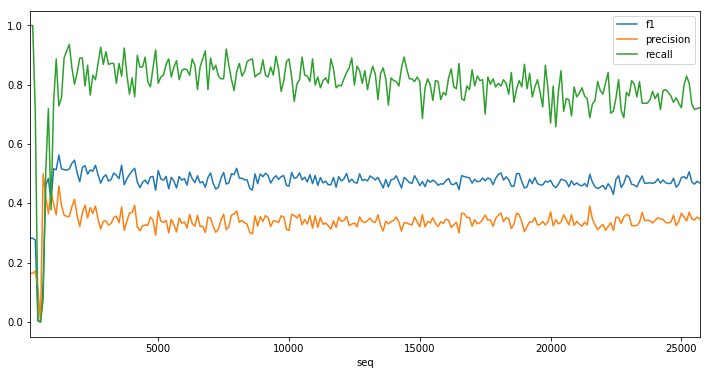

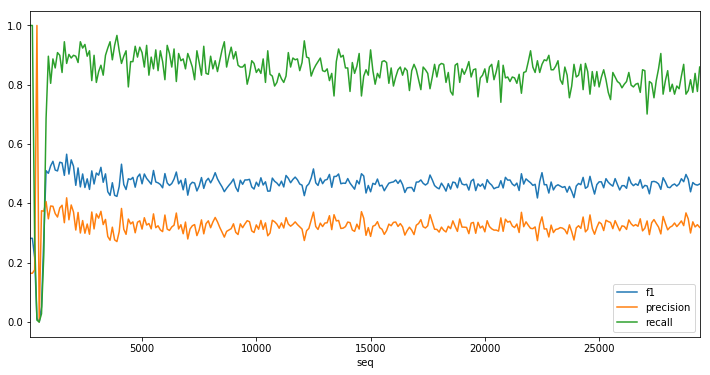

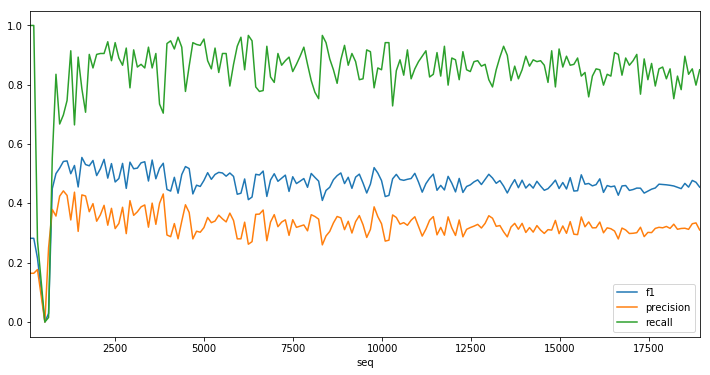

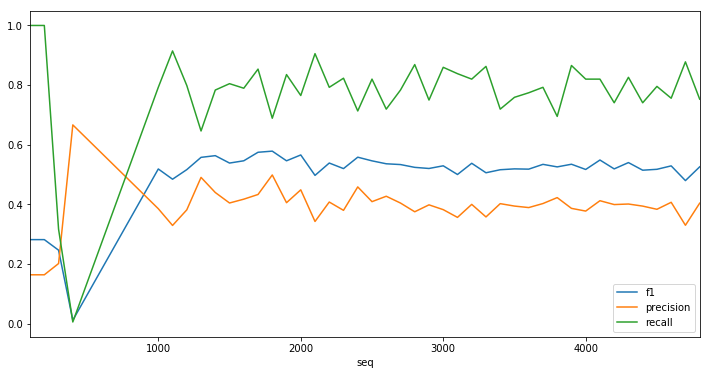

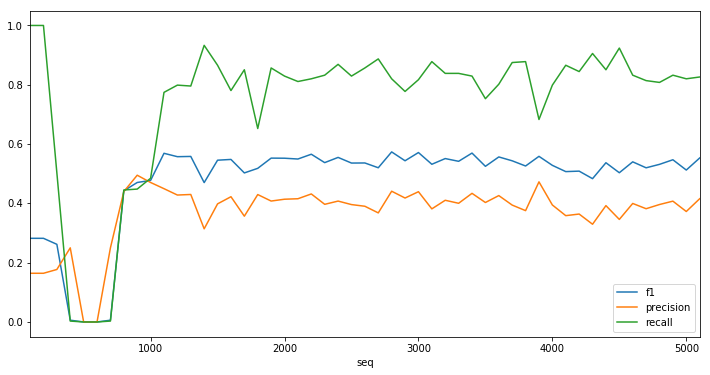

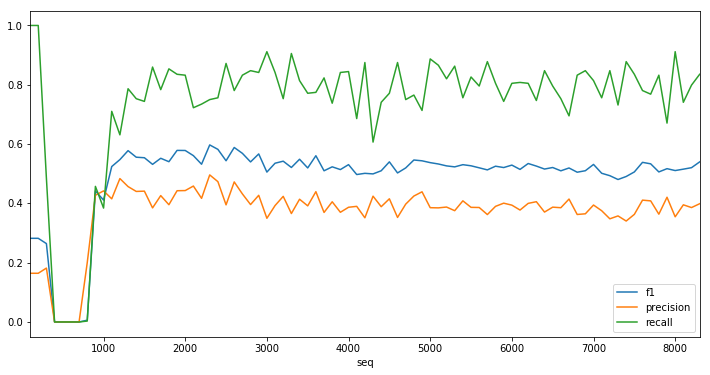

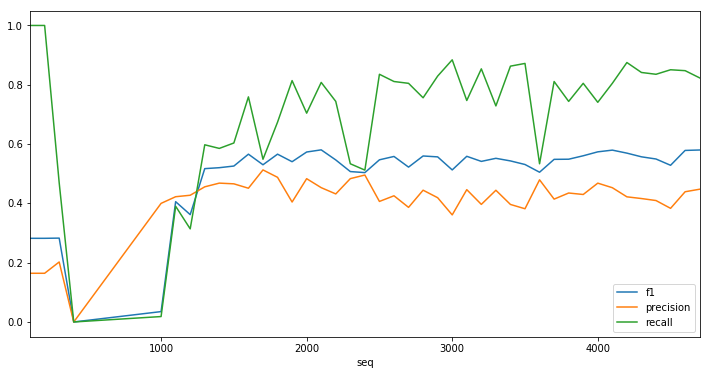

In [6]:
# plt.rcParams["figure.figsize"] = (6,5)
# print(df_100.f1.nlargest(10).mean())
# print(df_200.f1.nlargest(10).mean())
print(df_400.f1.nlargest(3).mean())
print(df_800.f1.nlargest(3).mean())
# print(df_1230.f1.nlargest(10).mean())
print(df_1661.f1.nlargest(3).mean())
print(df_2461.f1.nlargest(3).mean())
# print(df_3562.f1.nlargest(10).mean())

print("neg")
print(df_400_neg.f1.nlargest(3).mean())
print(df_800_neg.f1.nlargest(3).mean())
print(df_800_neg_1600.f1.nlargest(3).mean())
print(df_800_neg_6013.f1.nlargest(3).mean())

print(df_800_neg_1600.f1.nlargest(10))

df_400.plot()
df_800.plot()
df_1661.plot()
df_2461.plot()

df_400_neg.plot()
df_800_neg.plot()
df_800_neg_1600.plot()
df_800_neg_6013.plot()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/100.out/yolov2-voc_1600.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('100 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/200.out/yolov2-voc_1500.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('200 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/400.out/yolov2-voc_1100.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('400 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/800.out/yolov2-voc_1200.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('800 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/1230.out/yolov2-voc_2080.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('1230 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/1661.out/yolov2-voc_1700.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('1661 Training Samples')
plt.legend(loc="lower right")
plt.show()

ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/2461.out/yolov2-voc_1560.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('2461 Training Samples')
plt.legend(loc="lower right")
plt.show()


ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/3562.out/yolov2-voc_5720.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('3562 Training Samples')
plt.legend(loc="lower right")
plt.show()


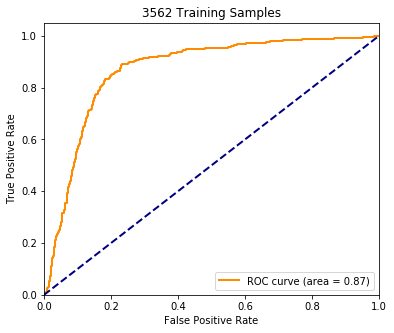

In [11]:

ds = pickle.load( open('/mnt/ml-data4/error-analysis/tsd-val/800_neg_1600.out/yolov2-voc_2300.weights.pkl', "rb" ) )
df = pd.DataFrame([[d[0], d[1][0][1]] for d in ds], columns=['fn', 'p'])
df['y_true'] = df.fn.str.contains('/mnt/ml-data4/tsd/jpgs/positives/')

fpr, tpr, _ = roc_curve(df.y_true, df.p)
test_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % test_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('3562 Training Samples')
plt.legend(loc="lower right")
plt.show()